Griffin Shelor\
3-4-2024

# In-class Exercises: SciPy Misc Functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from geopy.distance import geodesic

#### Q1. Read the file 'lecture18_magnetics.csv' into a `pandas` `DataFrame`.

In [2]:
## reading in csv
magnetics = pd.read_csv('lecture18_magnetics.csv')

#### Q2. Fit a curve to 'Longitude' vs 'Age' from your magnetics `DataFrame` using `interp1d(...)`. 

In [3]:
fit = interp1d(magnetics['Longitude'], magnetics['Age'])

#### Q3. Read the file 'lecture18_drillsites.csv' into a `pandas` `DataFrame`

In [4]:
drillsites = pd.read_csv('lecture18_drillsites.csv')

#### Q4. Using the interpolation function you created in Q2, add an 'Age' column to your drillsites `DataFrame`. Display the `DataFrame`.

To do this, you will evaluate your interpolant from Q2 at the 'Longitude' points in the Q3 `DataFrame`.

In [9]:
drillsites['Age'] = fit(drillsites['Longitude'])
drillsites

,Site,Primary/ Alternate,Profile,CDP,Latitude,Longitude,Sediment Thickness,Water Depth,Age
0,11B,Alternate,CREST01,12603,-30.22233,-15.03817,104,3057,6.552149
1,12A,Alternate,CREST01,14712,-30.10376,-15.04832,96,3373,6.610624
2,13A,Primary,CREST01,11923,-30.26056,-15.03490,50,3047,6.533310
3,23A,Alternate,CREST1E,8724,-30.39535,-16.87974,162,3819,14.667926
4,24A,Alternate,CREST1DE,3434,-30.40021,-16.93053,94,3676,14.879114
5,25A,Primary,CREST02,12770,-30.40344,-16.92282,104,3691,14.847055
6,31A,Alternate,CREST03,11346,-30.76406,-20.43255,183,4188,30.391235
7,33B,Primary,CREST03,12300,-30.71029,-20.43390,138,4193,30.396655
8,35A,Alternate,CREST03,13680,-30.63251,-20.43586,93,4157,30.404524
9,41A,Alternate,CREST04,10926,-31.00332,-24.81913,203,4408,48.948384


#### Q5. On a single figure, plot 'Longitude' (x-axis) vs 'Age' (y-axis) for both the magnetics and drillsite `DataFrames`. For the magnetics data use a solid line for your plot, and for the drillsites use symbols (and no line). Label the axes and add a legend.

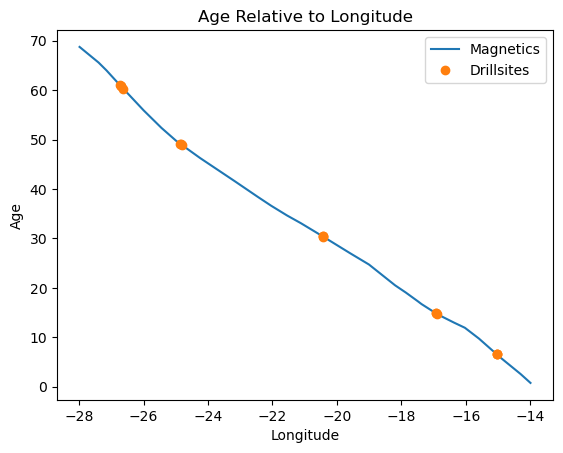

In [6]:
## plotting magnetics
plt.plot(magnetics['Longitude'], magnetics['Age'], label = 'Magnetics')
plt.plot(drillsites['Longitude'], drillsites['Age'], 'o', label = 'Drillsites')
plt.xlabel('Longitude')
plt.ylabel('Age')
plt.title("Age Relative to Longitude")
plt.legend(loc = 'best');

#### Q6. Calculate the geodesic distance in kilometers between Site 13A and Site 25A.

These are two different rows in the drillsite `DataFrame`; your first step here should be to find the site coordinates for each.

In [7]:
## getting coordinates
lat13a = drillsites[drillsites['Site']=='13A']['Latitude'].values[0]
lon13a = drillsites[drillsites['Site']=='13A']['Longitude'].values[0]

lat25a = drillsites[drillsites['Site']=='25A']['Latitude'].values[0]
lon25a = drillsites[drillsites['Site']=='25A']['Longitude'].values[0]

## calculating geodesic distance
geodist = geodesic((lat13a, lon13a), (lat25a, lon25a)).km
geodist

182.2364554668959

#### Q7. The drill ship has an average transit speed of 10 knots (nautical mile per hour).  How long will it take to travel between Site 13A and Site 25A?
* Note that 1 km = 0.54 nautical miles.

In [8]:
## converting to km/hour
km_hour = 10 / 0.54

## estimating travel time in hours
travel_time = geodist / km_hour

travel_time

9.840768595212378

### Save your notebook and output an html version. To receive credit for this in-class exercise upload both the .html and .ipynb files.